In [1]:
import numpy as np
from graspy.embed.svd import selectDim

In [2]:
def gen(p):
    return np.random.binomial(1,p,(100)).reshape(10,10)*2-1

In [3]:
def gen_mat(p, n):
    mat = gen(p)
    for i in range(n):
        mat = gen(p) @ mat
    return mat

In [4]:
import matplotlib.pyplot as plt

In [5]:
j = []
for i in range(1000):
    j.append(np.sum(np.sum(gen_mat(.2,1000))))

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0., 1000.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.]),
 array([-0.5       , -0.46666667, -0.43333333, -0.4       , -0.36666667,
        -0.33333333, -0.3       , -0.26666667, -0.23333333, -0.2       ,
        -0.16666667, -0.13333333, -0.1       , -0.06666667, -0.03333333,
         0.        ,  0.03333333,  0.06666667,  0.1       ,  0.13333333,
         0.16666667,  0.2       ,  0.23333333,  0.26666667,  0.3       ,
         0.33333333,  0.36666667,  0.4       ,  0.43333333,  0.46666667,
         0.5       ]),
 <a list of 30 Patch objects>)

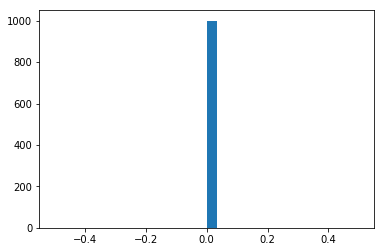

In [6]:
plt.hist(j, bins=30)

In [34]:
from scipy.linalg import orth
from scipy.linalg import svd

In [35]:
x = np.random.binomial(1,.6,(100)).reshape(10,10)
xorth = orth(x)
d = np.diag([10,10,10,5,5,5,2,2,2,0])
A = xorth.T @ d @ xorth
u,l,v = svd(A)

In [44]:
elbows, e_l, sing, all_l = selectDim(A, 4)

[4 7 8 9]


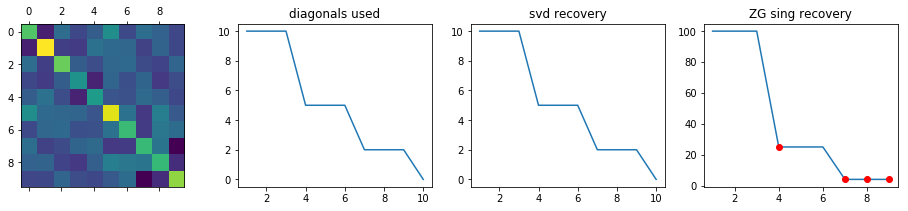

In [49]:
plt.figure(figsize=(16,3))
ax = plt.subplot(141)
ax.matshow(A)
ax2 = plt.subplot(142)
ax2.plot(range(1,len(np.diag(d))+1),np.diag(d))
plt.title('diagonals used')
ax3 = plt.subplot(143)
ax3.plot(range(1,len(l)+1),l)
plt.title('svd recovery')
ax4 = plt.subplot(144)
ax4.plot(range(1,len(sing)+1),sing)
plt.title('ZG sing recovery')
ax4.plot(elbows, sing[elbows-1], 'ro')
print(elbows)
plt.show()